# Appendix

## See smr data

In [ ]:
raw_data_folder_name = "all_monkey_data/individual_monkey_data/monkey_Bruno/data_0315/"

### overall info

In [ ]:
smr_class = process_raw_data.smr_extractor(data_folder_name = raw_data_folder_name)
temp_reader = neo.io.Spike2IO(filename=smr_class.full_path_file_names[0], try_signal_grouping=False)
temp_seg_reader = temp_reader.read_segment()

See the histogram of each channel

Channel name is LateralV


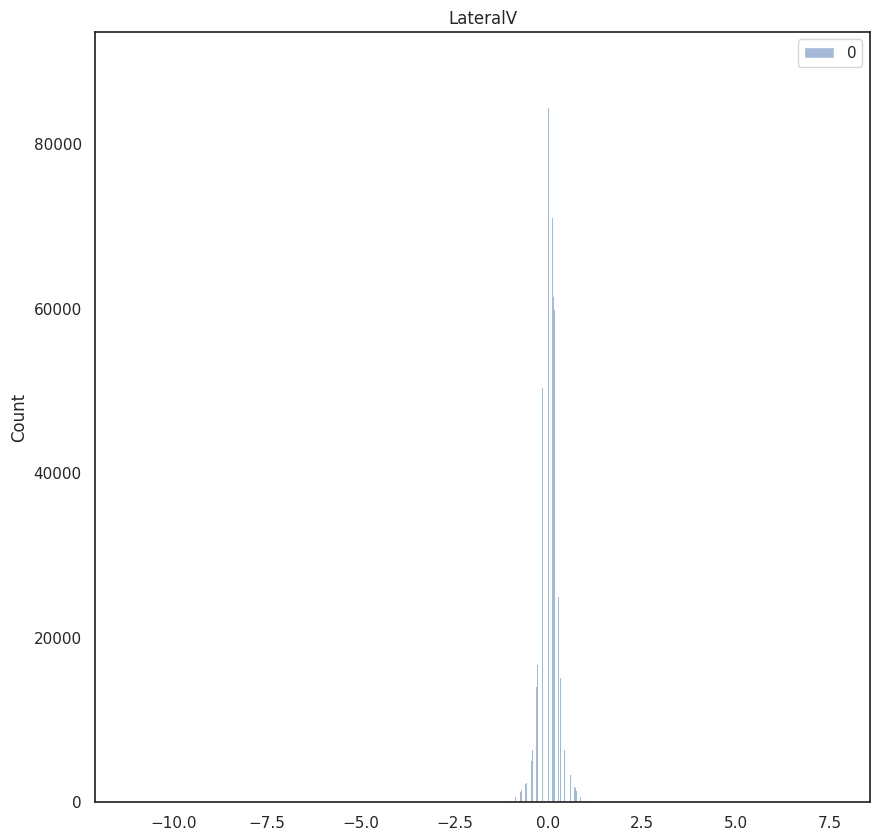

Channel name is LDy


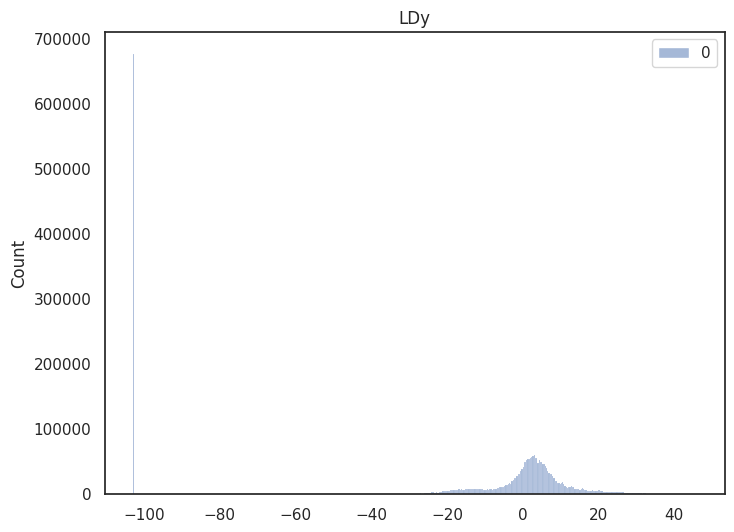

Channel name is LDz


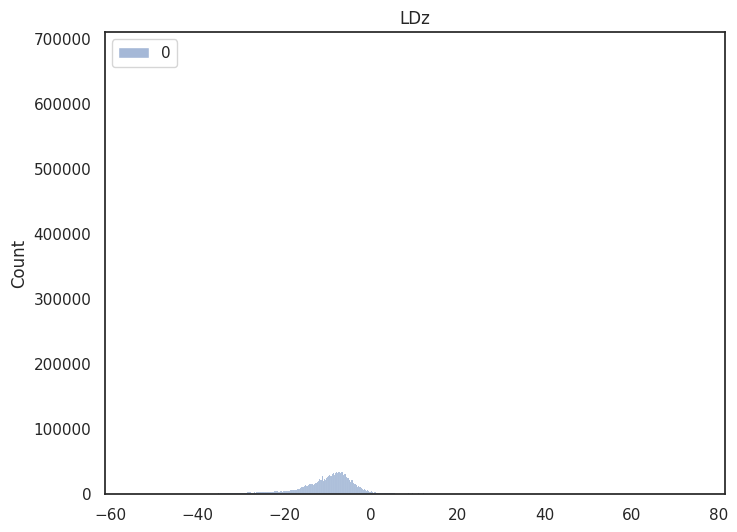

Channel name is FireflyY


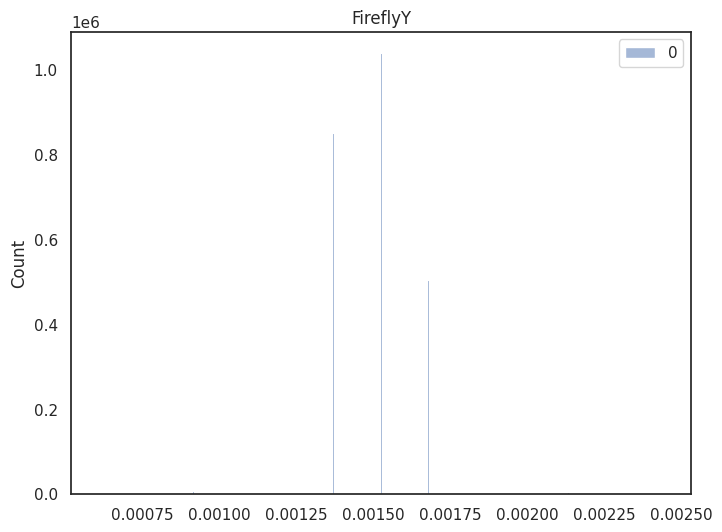

Channel name is MonkeyX


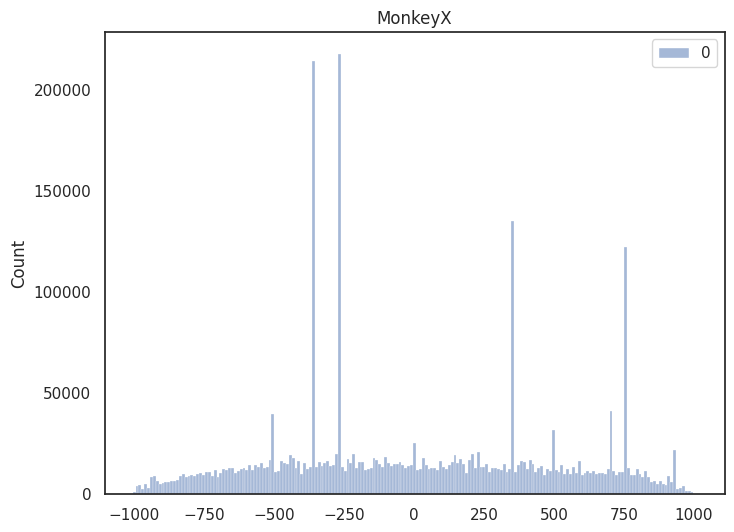

Channel name is MonkeyY


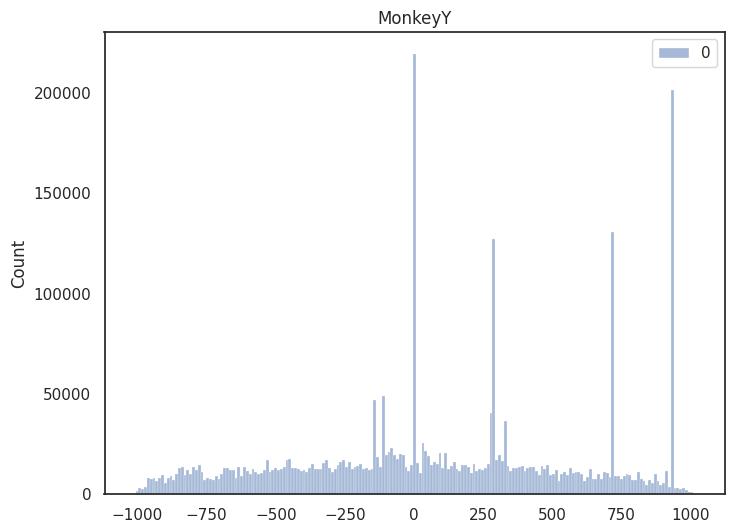

Channel name is RDy


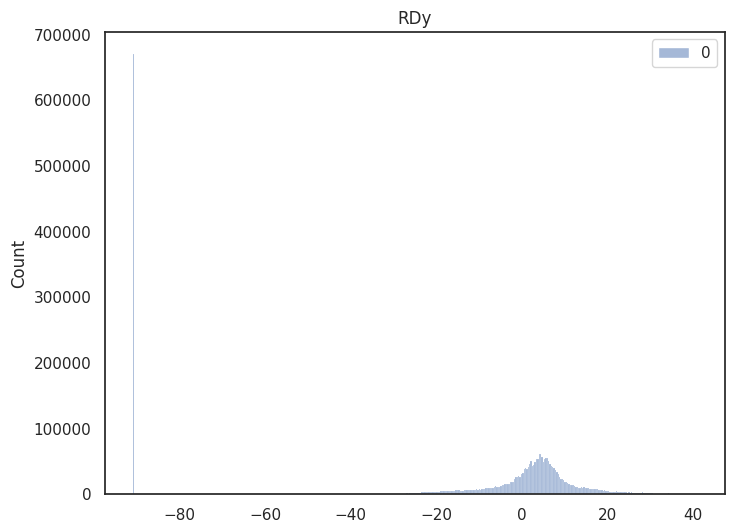

Channel name is RDz


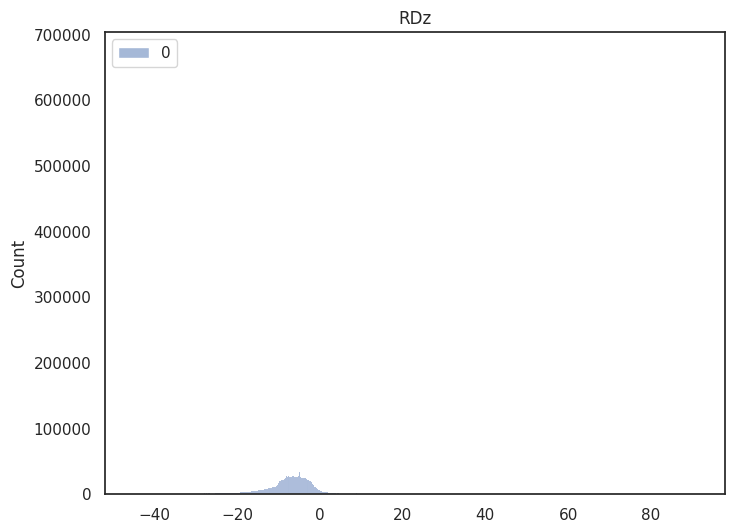

Channel name is RTx


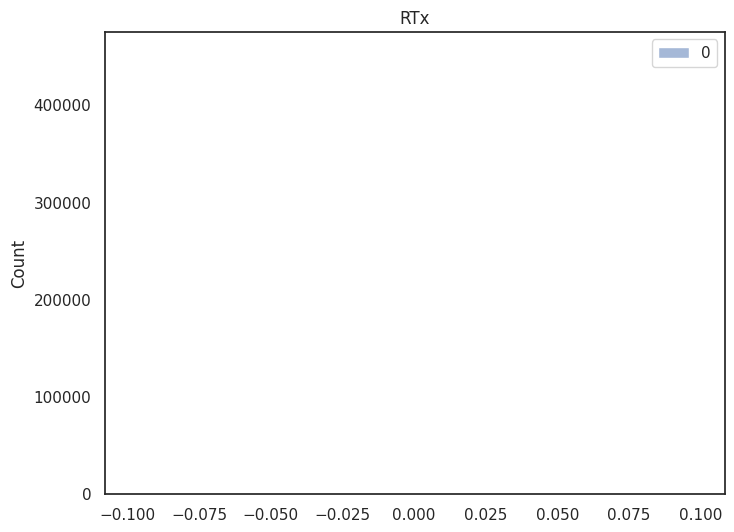

Channel name is RTy


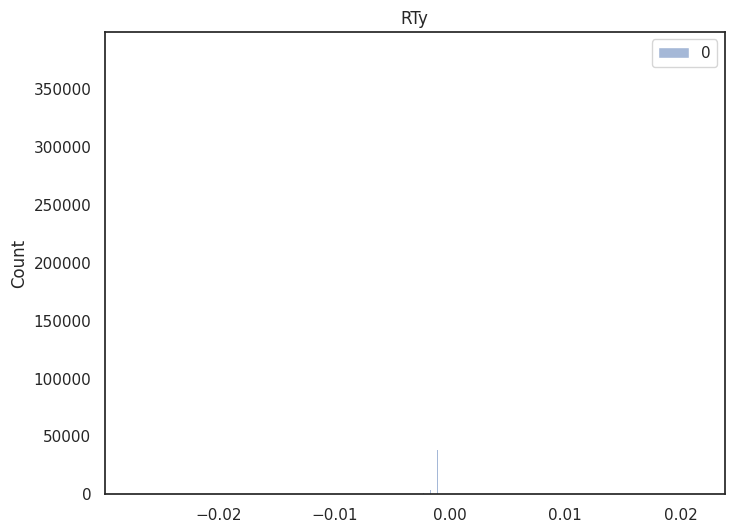

Channel name is RTz


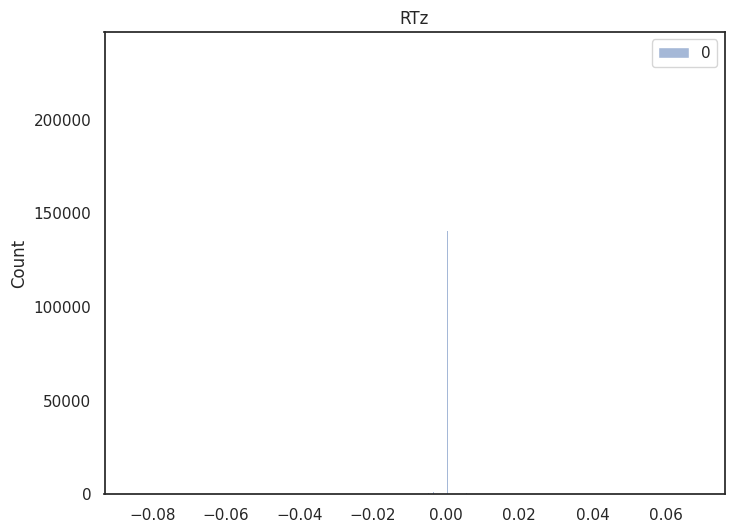

Channel name is AngularV


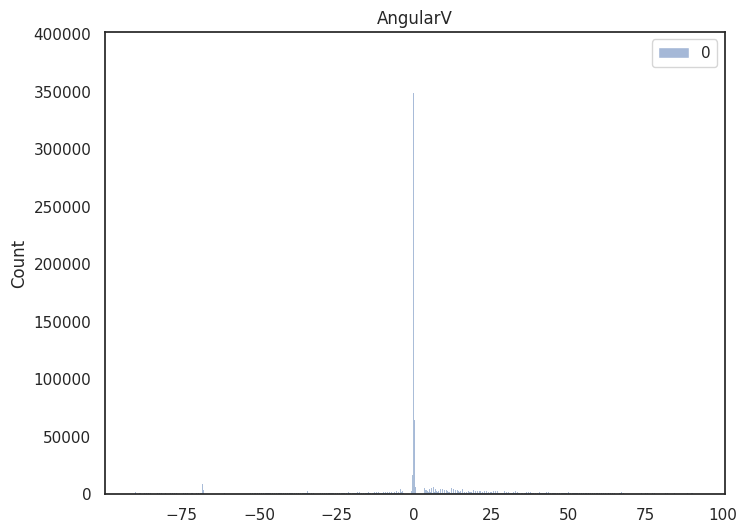

Channel name is ForwardV


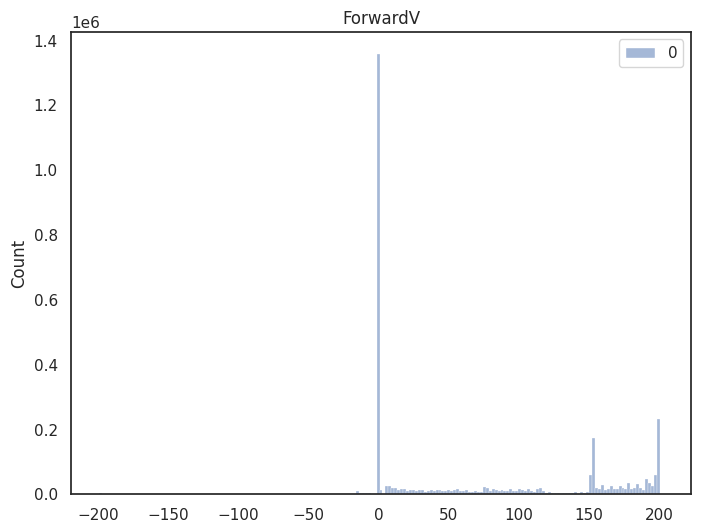

Channel name is HFB


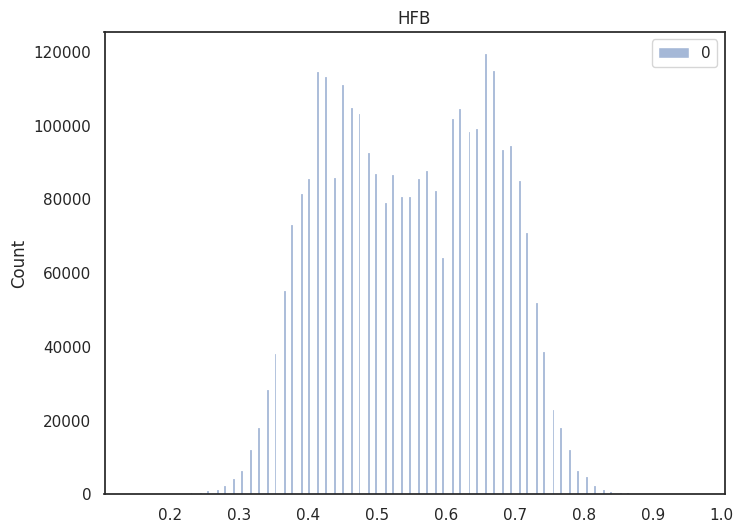

Channel name is Raw


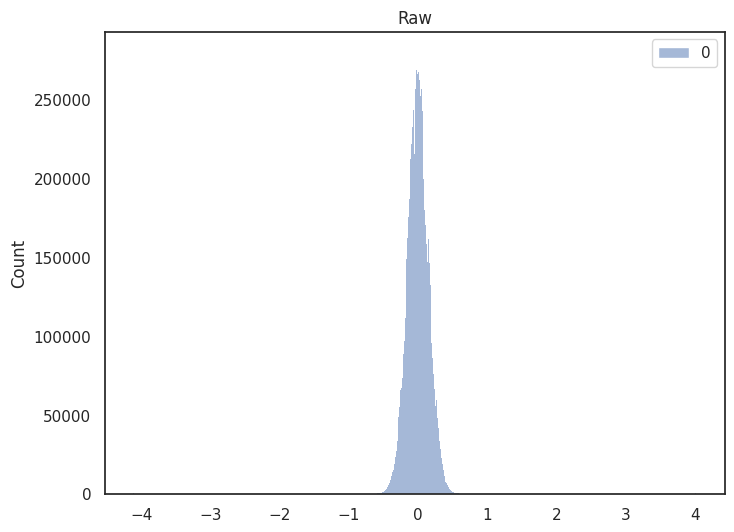

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
for channel_num in range(16):
    channel_of_interest = temp_seg_reader.analogsignals[channel_num].as_array()
    channel_name = temp_seg_reader.analogsignals[channel_num].name
    if channel_name != 'JuiceFla':
        print("Channel name is", channel_name)
        sns.histplot(channel_of_interest)
        plt.title(channel_name)
        plt.show()

See the array of a channel

In [ ]:
temp_seg_reader.analogsignals[4][temp_seg_reader.analogsignals[4].as_array()>100]

array([], shape=(0, 1), dtype=float32) * cm

In [ ]:
temp_seg_reader.analogsignals[5].as_array()[1000:1100]

In [ ]:
temp_reader.parse_header()
# https://neo.readthedocs.io/en/stable/rawio.html
for k, v in temp_reader.header.items():
  print(k, v)

nb_block 1
nb_segment [1]
signal_streams [('LateralV', '0') ('LDy', '1') ('LDz', '2') ('JuiceFla', '3')
 ('FireflyY', '4') ('MonkeyX', '5') ('MonkeyY', '6') ('RDy', '7')
 ('RDz', '8') ('RTx', '9') ('RTy', '10') ('RTz', '11') ('AngularV', '12')
 ('ForwardV', '13') ('HFB', '14') ('Raw', '15')]
signal_channels [('LateralV', '0',   833.33333333, 'int16', 'cm/s',  0.01220703,   -0.23228529, '0')
 ('LDy', '1',   833.33333333, 'int16', 'deg',  0.00289917,   -8.        , '1')
 ('LDz', '2',   833.33333333, 'int16', 'deg', -0.00259399,  -10.        , '2')
 ('JuiceFla', '3',   833.33333333, 'int16', 'volt',  0.00015259,    0.        , '3')
 ('FireflyY', '4',   833.33333333, 'int16', 'cm',  0.00015259,    0.        , '4')
 ('MonkeyX', '5',   833.33333333, 'int16', 'cm',  0.15258789,   -4.87218809, '5')
 ('MonkeyY', '6',   833.33333333, 'int16', 'cm',  0.15258789,  109.72383881, '6')
 ('RDy', '7',   833.33333333, 'int16', 'deg',  0.00289917,    4.        , '7')
 ('RDz', '8',   833.33333333, 'int16'

### see the dataframe

In [ ]:
Channel_signal_output, marker_list, smr_sampling_rate = process_raw_data.smr_extractor(data_folder_name = raw_data_folder_name).extract_data()

#Considering the first smr file, use marker_list[0], Channel_signal_output[0]
juice_timestamp = marker_list[0]['values'][marker_list[0]['labels']==4]
Channel_signal_smr1 = Channel_signal_output[0]
Channel_signal_smr1['section'] = np.digitize(Channel_signal_smr1.Time,juice_timestamp) # seperate analog signal by juice timestamps
# Remove tail of analog data
Channel_signal_smr1 = Channel_signal_smr1[Channel_signal_smr1['section']<Channel_signal_smr1['section'].unique()[-1]]
Channel_signal_smr1['Time'].iloc[-1] = juice_timestamp[-1]
# Remove head of analog data
Channel_signal_smr1 = Channel_signal_smr1[Channel_signal_smr1['Time']>marker_list[0]['values'][marker_list[0]['labels']==1][0]]

monkey_smr_dataframe = Channel_signal_smr1[["Time", "Signal stream 1", "Signal stream 2", "Signal stream 3", "Signal stream 10"]].reset_index(drop=True)
monkey_smr_dataframe.columns = ['monkey_t', 'monkey_x', 'monkey_y', 'monkey_speed', 'AngularV']
monkey_smr_dataframe[:3]

In [ ]:
# Turn the df to dict
monkey_smr = dict(zip(monkey_smr_dataframe.columns.tolist(), np.array(monkey_smr_dataframe.values.T.tolist())))
delta_time = np.diff(monkey_smr['monkey_t'])
delta_x = np.diff(monkey_smr['monkey_x'])
delta_y = np.diff(monkey_smr['monkey_y'])
delta_position = np.sqrt(np.square(delta_x)+np.square(delta_y))
crossing_boundary = np.append(0, (delta_position > 50).astype('int'))
monkey_speed = np.divide(delta_position, delta_time)
monkey_speed = np.append(monkey_speed[0], monkey_speed)

### plot a segment using monkey_smr

In [ ]:
x = 1000
fig, axes = plt.subplots()
mx = monkey_smr['monkey_x'][x:x+100]
my = monkey_smr['monkey_y'][x:x+100]

plt.plot(mx, my)
# for i in range(len(mx)):
#     plt.annotate(str(i), (mx[i], my[i]))
axes.set_aspect('equal')
plt.show()

In [ ]:
x = 167050
mx = monkey_smr['monkey_x'][x:x+100]
my = monkey_smr['monkey_y'][x:x+100]
fig, axes = plt.subplots()
axes.plot(mx, my)
# for i in range(len(mx)):
#     axes.annotate(str(i), (mx[i], my[i]))
axes.set_aspect('equal')
plt.show()

In [ ]:
delta_position[x:x+100][9:22]

### see how far two points are from each other

In [ ]:
second = 15
first = 13
delta_x = mx[second] - mx[first]
delta_y = my[second] - my[first]
delta_position = np.sqrt(np.square(delta_x)+np.square(delta_y))
delta_position

In [ ]:
second = 55
first = 65
delta_x = mx[second] - mx[first]
delta_y = my[second] - my[first]
delta_position = np.sqrt(np.square(delta_x)+np.square(delta_y))
delta_position

### plot angular V

In [ ]:
x = 10000
mv = monkey_smr_dataframe['monkey_speed'][x:x+100]
plt.plot(range(100), mv, marker="o")
plt.show()

### plot a segment using monkey_information

In [ ]:
x = 10000
for x in range(1000, 1100, 5):
    mx = monkey_information['monkey_x'].values[x:x+5]
    my = monkey_information['monkey_y'].values[x:x+5]
    plt.plot(mx, my, marker="o")
    # for i in range(len(mx)):
    #     plt.annotate(str(i), (mx[i], my[i]))
    plt.show()

### Dissect the functions

In [ ]:
seg_reader = neo.io.Spike2IO(filename=smr_class.full_path_file_names[0], try_signal_grouping=False).read_segment()

In [ ]:
seg_reader.analogsignals[6].as_array()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 30.988487],
       [ 31.141075],
       [ 30.988487],
       ...,
       [324.72018 ],
       [324.5676  ],
       [324.415   ]], dtype=float32)

In [ ]:
Channel_signal_output = [] 
smr_sampling_rate = seg_reader.analogsignals[0].sampling_rate 
    
analog_length = min([i.size for i in seg_reader.analogsignals]) # in case analog channels have different shape

Channel_index = [] # create an empty list to store channel names

for C_index, C_data in enumerate(seg_reader.analogsignals[:-1]): # -1 indicates we disgard 'Raw' channel   
    shape = seg_reader.analogsignals[C_index].shape[1] # See how many channels are contained in each element of the list
    if C_index==0:
      Channel_signal = C_data.as_array()[:analog_length,];
    else:
      Channel_signal = np.append(Channel_signal, C_data.as_array()[:analog_length,], axis=1)
    for i in range(shape):
      Channel_index.append(seg_reader.analogsignals[C_index].name) # get channel name one by one and put in Channel_index

Channel_signal = np.append(Channel_signal, np.asarray(seg_reader.analogsignals[0].times[:analog_length,]).reshape(analog_length,1), axis=1)# get time stamps and put in Channel_signal
Channel_index.append('Time') 

Channel_signal_output.append(pd.DataFrame(Channel_signal,columns=Channel_index))

#find the index of the channel called 'marker' 
marker_channel_index = [index for index,value in enumerate(seg_reader.events) if value.name == 'marker'][0] 
marker_labels = seg_reader.events[marker_channel_index].get_labels().astype('int') # get 'marker' labels
marker_values = seg_reader.events[marker_channel_index].as_array() # get 'marker' values
marker = {'labels': marker_labels, 'values': marker_values} # arrange labels and values in a dict
marker_list.append(marker)

In [ ]:
Channel_signal_output

In [ ]:
np.where(seg_reader.analogsignals[6].as_array() > 100)

In [ ]:
Channel_signal_output, marker_list, smr_sampling_rate = process_raw_data.smr_extractor(data_folder_name = raw_data_folder_name).extract_data()
# Considering the first smr file, use marker_list[0], Channel_signal_output[0]
juice_timestamp = marker_list[0]['values'][marker_list[0]['labels'] == 4]
Channel_signal_smr1 = Channel_signal_output[0]
# Set a default value of accurate_end_time in case Channel_signal_smr1 is empty
accurate_end_time = 99998
if len(Channel_signal_smr1):
    Channel_signal_smr1['section'] = np.digitize(Channel_signal_smr1.Time, juice_timestamp) # seperate analog signal by juice timestamps
    # Remove tail of analog data
    Channel_signal_smr1 = Channel_signal_smr1[Channel_signal_smr1['section']<  Channel_signal_smr1['section'].unique()[-1]]
    if len(Channel_signal_smr1) > 0:
      
        Channel_signal_smr1.loc[Channel_signal_smr1.index[-1], 'Time'] = juice_timestamp[-1]
        # Remove head of analog data
        Channel_signal_smr1 = Channel_signal_smr1[Channel_signal_smr1['Time'] > marker_list[0]['values'][marker_list[0]['labels']==1][0]]
        # monkey_smr_dataframe = Channel_signal_smr1[["Time", "Signal stream 1", "Signal stream 2", "Signal stream 3", "Signal stream 10"]].reset_index(drop=True)
        # monkey_smr_dataframe.columns = ['monkey_t', 'monkey_x', 'monkey_y', 'monkey_speed', 'AngularV']
        # monkey_smr = dict(zip(monkey_smr_dataframe.columns.tolist(), np.array(monkey_smr_dataframe.values.T.tolist())))
        accurate_end_time = Channel_signal_smr1.Time.values[-1]


In [ ]:
Channel_signal_output, marker_list, smr_sampling_rate = process_raw_data.smr_extractor(data_folder_name = raw_data_folder_name).extract_data()
# Considering the first smr file, use marker_list[0], Channel_signal_output[0]
juice_timestamp = marker_list[0]['values'][marker_list[0]['labels'] == 4]
Channel_signal_smr1 = Channel_signal_output[0]
# Set a default value of accurate_end_time in case Channel_signal_smr1 is empty
accurate_end_time = 99998
if len(Channel_signal_smr1):
    Channel_signal_smr1['section'] = np.digitize(Channel_signal_smr1.Time, juice_timestamp) # seperate analog signal by juice timestamps
    # Remove tail of analog data
    Channel_signal_smr1 = Channel_signal_smr1[Channel_signal_smr1['section']<  Channel_signal_smr1['section'].unique()[-1]]


done


In [ ]:
channel_signal = Channel_signal_smr1[['LateralV', 'LDy', 'LDz', 'RDy', 'RDz', 'MonkeyX', 'MonkeyY', 'AngularV', 'ForwardV', 'Time', 'section']]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
raw_data_folder_name

'all_monkey_data/individual_monkey_data/monkey_Bruno/date_0315/'

In [ ]:
if raw_data_folder_name:
  filepath = raw_data_folder_name + '/channel_signal.csv'
  os.makedirs(raw_data_folder_name, exist_ok = True)
  channel_signal.to_csv(filepath)

## Other plots

### Plot all_trial_patterns using px

In [ ]:
import plotly.express as px
sum_columns = all_trial_patterns[['one_in_a_row','two_in_a_row', 'three_in_a_row', 'four_in_a_row', 'multiple_in_a_row',
                          'multiple_in_a_row_all', 'visible_before_last_one', 'disappear_latest',
                          'ignore_sudden_flash', 'try_a_few_times', 'give_up_after_trying',
                          'cluster_around_target', 'waste_cluster_around_target']].sum().reset_index()
sum_columns = sum_columns.set_axis(['categories', 'sum'], axis=1)
sum_columns['percentage(%)'] = sum_columns['sum']/len(all_trial_patterns)*100
sum_columns['complement(%)'] = 100 - sum_columns['percentage(%)']
sum_columns
fig = px.bar(sum_columns, x='categories', y='percentage(%)')
fig.show()